In [1]:
import helpers
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib import ticker
import seaborn as sns

mpl.rcParams['text.usetex'] = True
sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
dfs, dfscoef = helpers.load_final_results()

# S4

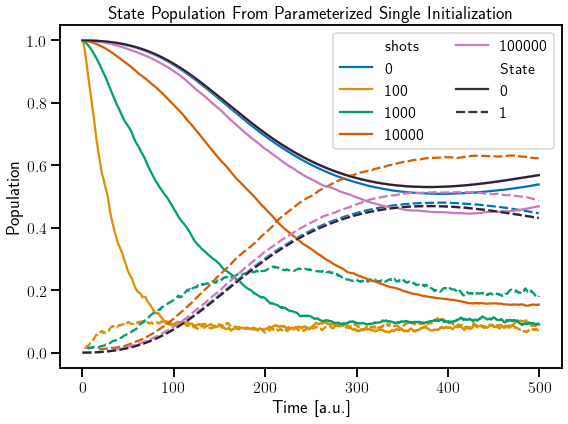

In [2]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-2&Type=="TDVQP"  & parameterized=="yes" & simulation=="single"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-6 &Type=="Exact" & parameterized=="yes" & simulation=="single"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,legend=None,alpha=1)
plt.xlabel(r'Time [a.u.]')
plt.title(r'State Population From Parameterized Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=2)

plt.tight_layout()

# Figure 7

In [3]:
import pandas as pd
from scipy.optimize import curve_fit

## Generates treshold fit and adds to dataframe

def custom_func(x, a):
    return a ** x 

grouped = dfs.groupby(['shots'])

for name, group in grouped:
    popt, _ = curve_fit(custom_func, group['times'], group['fidelity_to_exact'])
    dfs.loc[dfs['shots'] == name, 'fitted'] = custom_func(dfs.loc[dfs['shots'] == name, 'times'], *popt)
    dfs.loc[dfs['shots'] == name, 'threshold'] = popt[0]


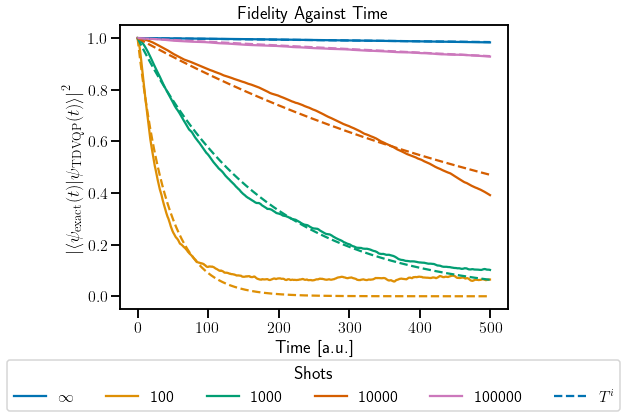

In [4]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 6)))

sns.lineplot(data=dfs.query("parameterized=='no'"), x="times", y="fidelity_to_exact", ci=None, ax=ax, palette="colorblind",hue='shots')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
ax.set_title('Fidelity Against Time')
sns.lineplot(data=dfs,x='times',y='fitted',ci=None,palette="colorblind",ax=ax,hue='shots',linestyle='--',label='$T^i$',color='black')
# plt.hlines(1/16,0,500)
handles, labels = plt.gca().get_legend_handles_labels()
labels[0]='$\infty$'
plt.legend(handles=handles[0:6], labels=labels[0:6], ncol=6,bbox_to_anchor=(0.5, -0.15), loc='upper center',title='Shots')
plt.tight_layout()

# Figure 8

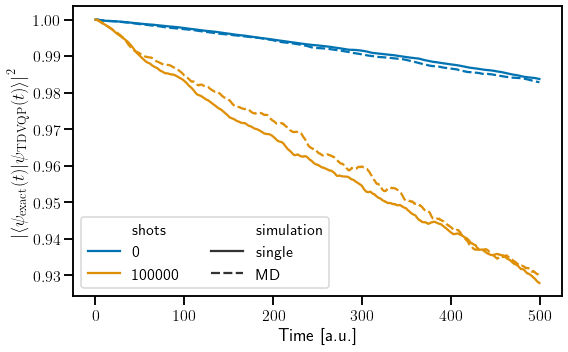

In [12]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 5)))
sns.lineplot(data=dfs.query('parameterized=="no" & shots==100000|shots==0'), x="times", y="fidelity_to_exact", ci=None, ax=ax, palette="colorblind",hue='shots',style='simulation')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=2)
plt.tight_layout()

# Figure S3

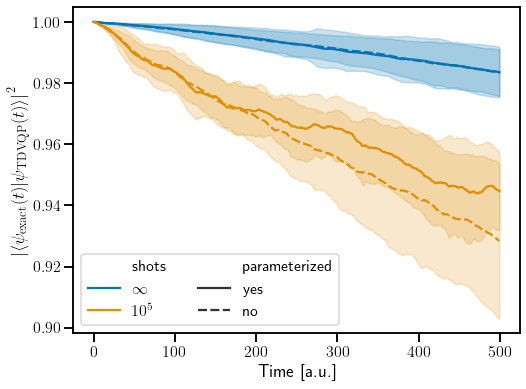

In [13]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 6)))
sns.lineplot(data=dfs.query("shots>10**4|shots==0"), x="times", y="fidelity_to_exact", ci='sd', ax=ax, palette="colorblind",hue='shots',style='parameterized')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
handles, labels = plt.gca().get_legend_handles_labels()
labels[1]='$\infty$'# for prettier legend
labels[2]='$10^5$'# For prettier legend
plt.legend(handles=handles, labels=labels, ncol=2)

# Figure 6

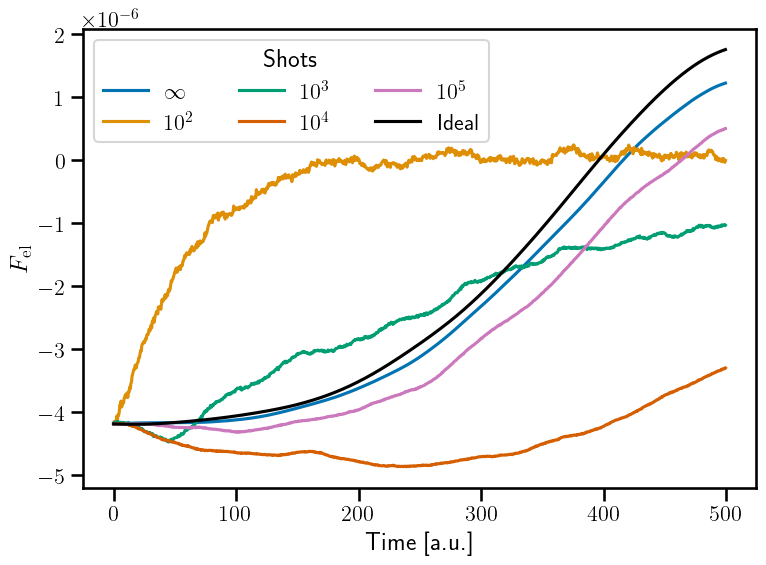

In [31]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs, x="times", y="QC_forces_el", ci=None, ax=ax, palette="colorblind",hue='shots')
sns.lineplot(data=df1, x="times", y="exact_forces_el", ci=None, ax=ax,color='black',label='Ideal')
ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=3,title='Shots')
plt.tight_layout()
plt.savefig('additional_plots/force_estimation.pdf')

# Figure 9

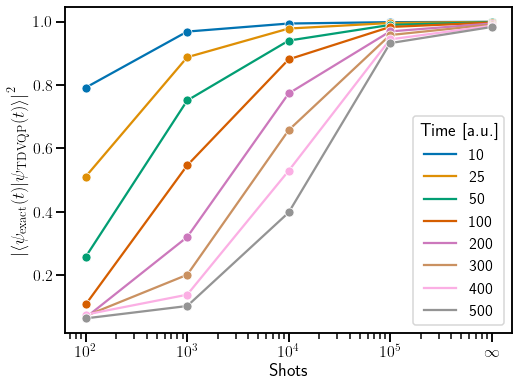

In [6]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 6)))
dfs['shots'] = dfs['shots'].replace(0, 10e5) # so that infinity is plotted after 10^5
sns.lineplot(data=dfs.query('parameterized=="no" & times==10|times==25|times==50|times==100|times==200|times==300|times==400|times==499'),marker='o', x="shots", y="fidelity_to_exact", ci=None, ax=ax, palette="colorblind",hue='times')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Shots')
plt.xscale('log')
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=labels, ncol=4,bbox_to_anchor=(0.5, -0.15), loc='upper center',title='Time [a.u.]')

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[-3] = '$\infty$'
ax.set_xticklabels(labels)
legend = ax.legend()

for i in range(len(legend.get_texts())):
    old_label = legend.get_texts()[i].get_text()
    new_label = str(round(float(old_label) / 5) * 5).replace('.0', '')
    legend.get_texts()[i].set_text(new_label)
    legend.get_texts()[i].set_text(new_label)
legend.set_title('Time [a.u.]')

# Figure 10

[Text(1, 0.9999499999999999, '$1-50 \\cdot 10 ^ {-6}$'),
 Text(1, 0.9999599999999998, '$1-40 \\cdot 10 ^ {-6}$'),
 Text(1, 0.9999699999999999, '$1-30 \\cdot 10 ^ {-6}$'),
 Text(1, 0.9999799999999999, '$1-20 \\cdot 10 ^ {-6}$'),
 Text(1, 0.9999899999999999, '$1-10 \\cdot 10 ^ {-6}$'),
 Text(1, 0.9999999999999999, '$1-0 \\cdot 10 ^ {-6}$'),
 Text(1, 1.0000099999999998, '$1--10 \\cdot 10 ^ {-6}$')]

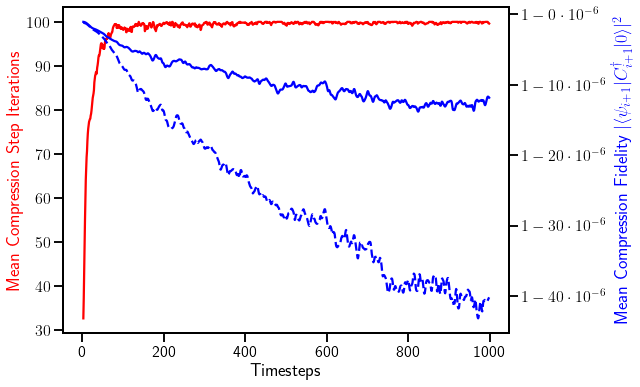

In [10]:
fig, ax = plt.subplots(figsize=((8, 6)))

sns.lineplot(data=dfs.query('shots==10e5 &times>1'),x='times',y='iter_number',ci=None,ax=ax,estimator='mean',color='r')
ax2 = ax.twinx()
sns.lineplot(data=dfs.query('shots==10e5 &times>1'),x='times',y='final_F',ci=None,ax=ax2,estimator='mean',color='b')
sns.lineplot(data=dfs.query('shots==10e5 &times>1'),x='times',y='init_F',ci=None,ax=ax2,estimator='mean',color='b',linestyle="dashed")

ax.set_xlabel('Timesteps')
xticks = ax.get_xticks()
xticklabels = [f"{2*y:.{0}f}" for y in xticks]
ax.set_xticklabels(xticklabels)
ax.set_ylabel('Mean Compression Step Iterations', color='r')
ax2.set_ylabel(r'Mean Compression Fidelity $|\langle{\psi_{i+1}}|C^\dagger_{i+1}|{0}\rangle|^2$', color='b')
yticks = ax2.get_yticks()
yticks = (1-np.array(yticks))*10**6
yticklabels = [f"$1-{y:.{0}f} \cdot 10 ^ {{-6}}$" for y in yticks]
ax2.set_yticklabels(yticklabels)